<a href="https://www.kaggle.com/code/dishaasinghi/fog-prediction?scriptVersionId=128068105" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : bold; background-color: #f1f5f8 ; color : #ffa500; text-align: center; border-radius: 120px 120px;">Parkinsons Freezing of Gait Predication</h1>
<br>

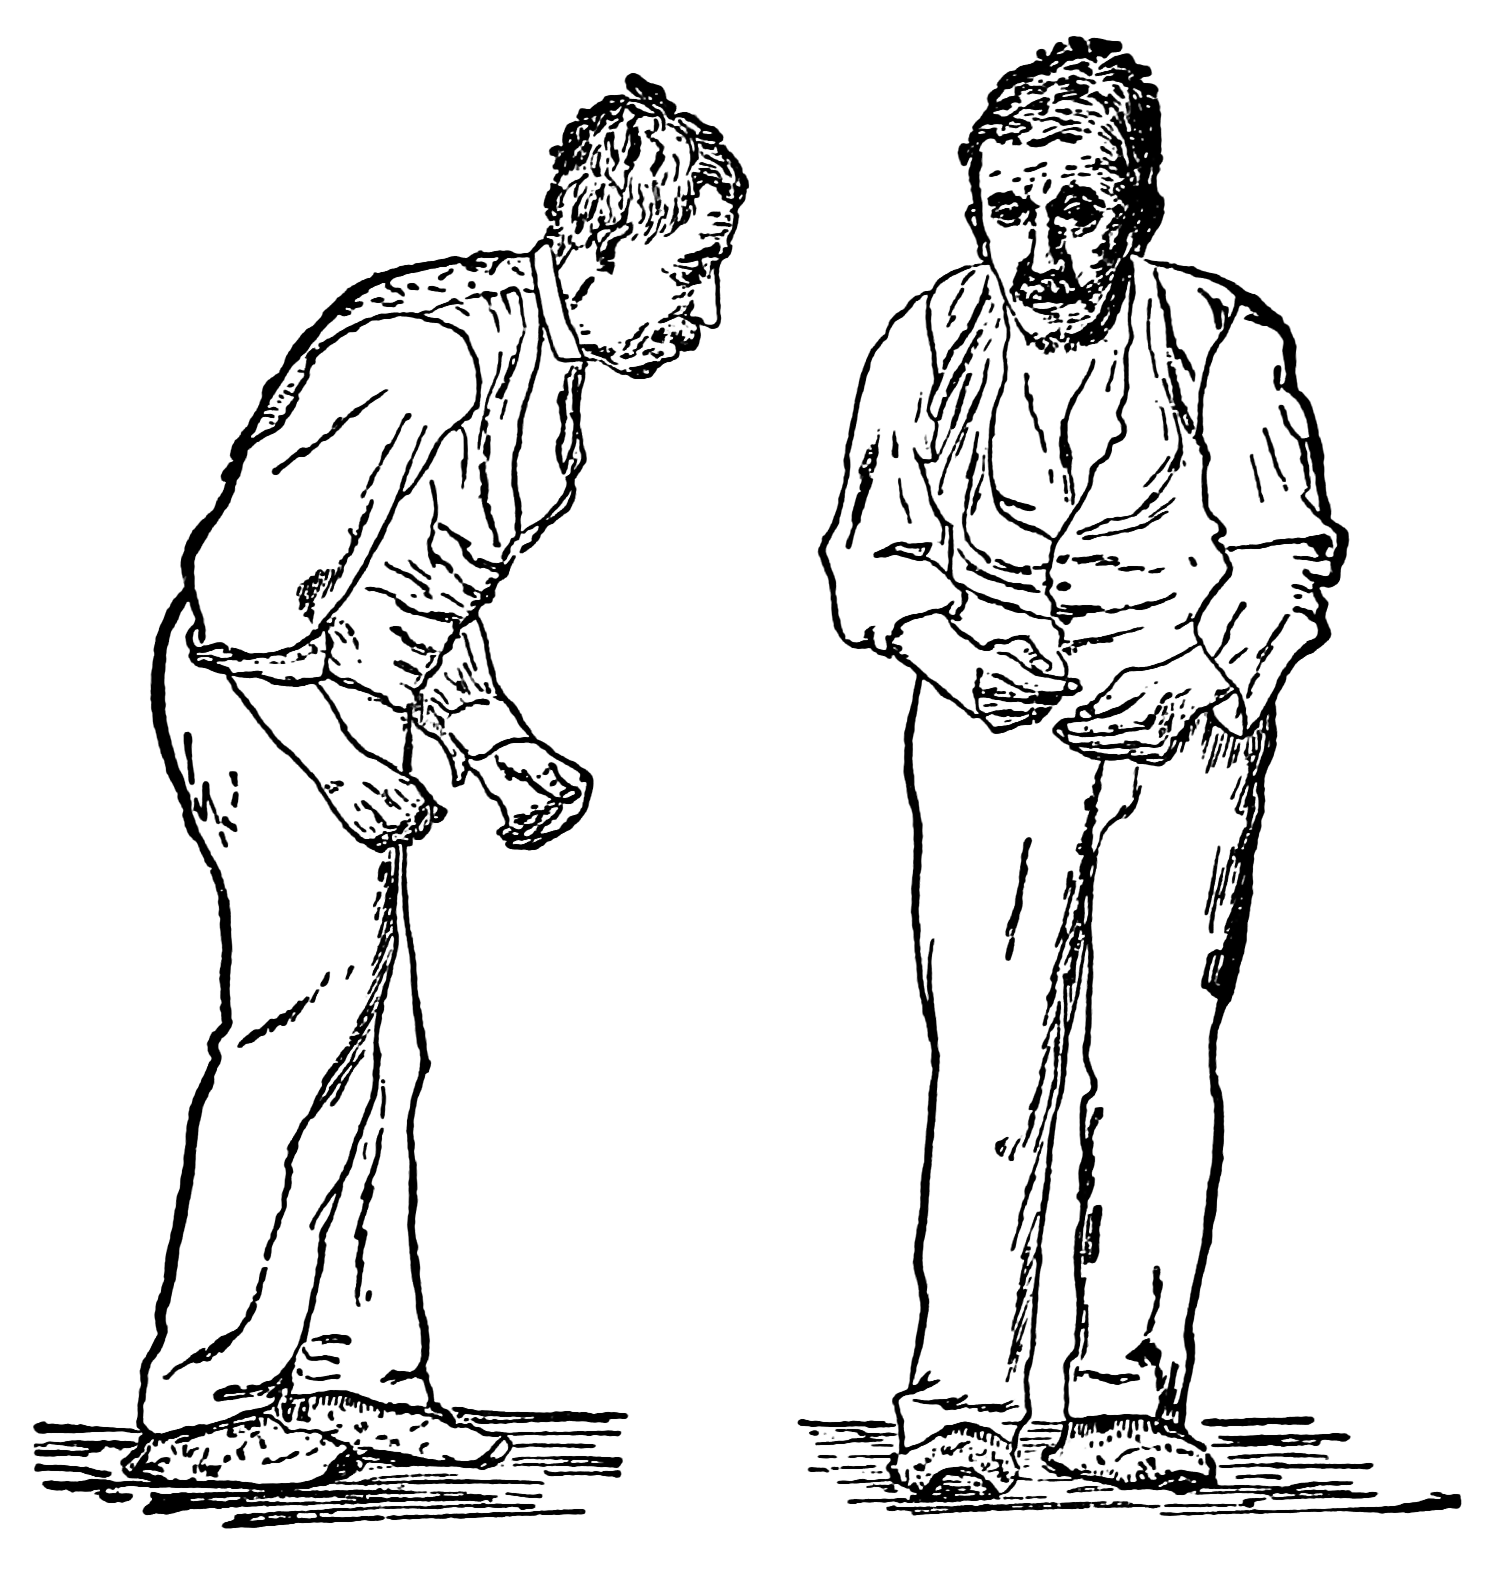

<br>
<h1 style = "font-size:50px; font-family:Garamond ; font-weight : bold; background-color: #f1f5f8 ; color : #ffa500; text-align: center; border-radius: 120px 120px;">Importing Python Libraries</h1>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

<br>
<h1 style = "font-size:50px; font-family:Garamond ; font-weight : medium; background-color: #f1f5f8 ; color : #ffa500; text-align: center; border-radius: 120px 120px;">Reading the Training and Test Datasets</h1>
<br>

In [2]:
dmetadata = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/daily_metadata.csv")
d_defog = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv")
d_events = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv")
d_subjects = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv")
d_tasks = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv")
d_tdcs = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv')
d_tdcsfog = ('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog')
d_defog_=('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog')
test_tdcsfog = ('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/test/tdcsfog')
test_defog = ('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/test/defog')

<br>
<h1 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: #f1f5f8 ; color : #ffa500; text-align: center; border-radius: 120px 120px;">Segregating files from folder </h1>
<br>

In [3]:
td_list = []

for file in os.listdir(d_tdcsfog):
    if file.endswith('.csv'):
        p_file = os.path.join(d_tdcsfog, file)
        file_new = pd.read_csv(p_file)
        td_list.append(file_new)
        
tdcsfog = pd.concat(td_list, axis = 0) #Joining them row-wise

#Explaining the above code:
#Firstly, we will be traversing through the datasets in the training data of the tdcsfog data and check for files that have an extension of .csv. Post that, we will be combining the paths of both the datasets into one complete path. 

In [4]:
#The similar technique we will be using for our defog (train) dataset
dg_list=[]
for file1 in os.listdir(d_defog_):
    if file1.endswith('.csv'):
        pp_file=os.path.join(d_defog_, file1)
        files=pd.read_csv(pp_file)
        dg_list.append(files)
        
new_defog=pd.concat(dg_list, axis=0)

<br>
<h1 style = "font-size:50px; font-family:Garamond ; font-weight : medium; background-color: #f1f5f8 ; color : #ffa500; text-align: center; border-radius: 120px 120px;">Analyzing the files and Feature Engineering</h1>
<br>

In [5]:
new_defog = new_defog[(new_defog['Task'] == 1) & (new_defog['Valid'] == 1)]
new_defog = new_defog.iloc[:, :7]

In [6]:
tdcsfog.shape

(7062672, 7)

In [7]:
new_defog.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,4.111322e+06,4.111322e+06,4.111322e+06,4.111322e+06,4.111322e+06,4.111322e+06,4.111322e+06
mean,9.113573e+04,-9.348869e-01,-1.300852e-03,-2.260192e-01,2.140431e-05,1.007900e-01,1.715288e-02
std,7.020982e+04,1.069422e-01,1.399125e-01,2.441998e-01,4.626430e-03,3.010504e-01,1.298409e-01
min,1.000000e+03,-6.024701e+00,-2.115008e+00,-5.118650e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.550000e+04,-9.850838e-01,-8.468409e-02,-3.639194e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.686400e+04,-9.390158e-01,0.000000e+00,-2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.294960e+05,-8.869410e-01,9.209929e-02,-1.135075e-01,0.000000e+00,0.000000e+00,0.000000e+00
max,4.143870e+05,4.458365e+00,4.524038e+00,4.388132e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
new_defog.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')

Highly Grateful to [Goki Fujiya](https://www.kaggle.com/gokifujiya) for the below code. Really helped to save memory.

In [9]:
def reduce_memory_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024 ** 2 
    print("Memory usage became: ",mem_usg," MB")
    
    return df

In [10]:
tdcsfog = reduce_memory_usage(tdcsfog)

Memory usage of dataframe is 431.07 MB
Memory usage became:  141.4452667236328  MB


In [11]:
new_defog = reduce_memory_usage(new_defog)

Memory usage of dataframe is 250.94 MB
Memory usage became:  82.33810615539551  MB


In [12]:
#Let us concat both the datasets (tdcsfog, new_defog) row-wise
df=pd.concat([new_defog, tdcsfog], axis=0)

In [13]:
df.shape

(11173994, 7)

In [14]:
X_check=df.iloc[:,1:4] #The independent variables 
#The Dependent Variables 
y1=df['StartHesitation'] 
y2=df['Turn']
y3=df['Walking']

In [15]:
y11 = np.where(y1 == 1)[0]
total = (y1 == 1).sum()
y01 = np.random.choice(np.where(y1 == 0)[0], size = total, replace = False)
y1_full = np.concatenate([y01, y11])
X1_final = X_check.iloc[y1_full, :]
y1_final = y1.iloc[y1_full]


y11_ = np.where(y2 == 1)[0]
total_ = (y2 == 1).sum()
y01_ = np.random.choice(np.where(y2 == 0)[0], size = total, replace = False)
y2_full = np.concatenate([y01_, y11_])
X2_final = X_check.iloc[y2_full, :]
y2_final = y2.iloc[y2_full]

_y11_ = np.where(y3 == 1)[0]
_total_ = (y3 == 1).sum()
_y01_ = np.random.choice(np.where(y3 == 0)[0], size = total, replace = False)
y3_full = np.concatenate([_y01_, _y11_])
X3_final = X_check.iloc[y3_full, :]
y3_final = y3.iloc[y3_full]

<br>
<h1 style = "font-size:50px; font-family:Garamond ; font-weight : semibold; background-color: #f1f5f8 ; color : #ffa500; text-align: center; border-radius: 120px 120px;">Model Selection</h1>
<br>

In [16]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_final, y1_final, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_final, y2_final, test_size=0.33, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_final, y3_final, test_size=0.33, random_state=42)

<br>
<h1 style = "font-size:50px; font-family:Garamond ; font-weight : medium; background-color: #f1f5f8 ; color : #ffa500; text-align: center; border-radius: 120px 120px;">Decision Tree - Fitting</h1>
<br>

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
#Postpruning
treemodel1=DecisionTreeClassifier(max_depth=8) 
treemodel2=DecisionTreeClassifier(max_depth=7) 
treemodel3=DecisionTreeClassifier(max_depth=9) 

In [19]:
treemodel1.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=8)

In [20]:
treemodel2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=7)

In [21]:
treemodel3.fit(X3_train, y3_train)

DecisionTreeClassifier(max_depth=9)

In [22]:
#Apologies in advance for the visiblity of the decision trees

[Text(0.4710899758454106, 0.9444444444444444, 'X[2] <= 2.327\ngini = 0.5\nsamples = 408536\nvalue = [204484, 204052]'),
 Text(0.2512832125603865, 0.8333333333333334, 'X[0] <= -5.592\ngini = 0.349\nsamples = 194934\nvalue = [150966, 43968]'),
 Text(0.14568236714975846, 0.7222222222222222, 'X[2] <= -0.598\ngini = 0.468\nsamples = 117226\nvalue = [73339, 43887]'),
 Text(0.06914251207729469, 0.6111111111111112, 'X[1] <= -1.125\ngini = 0.066\nsamples = 18236\nvalue = [17610, 626]'),
 Text(0.0320048309178744, 0.5, 'X[2] <= -1.278\ngini = 0.258\nsamples = 1947\nvalue = [1651, 296]'),
 Text(0.01570048309178744, 0.3888888888888889, 'X[0] <= -6.986\ngini = 0.103\nsamples = 1079\nvalue = [1020, 59]'),
 Text(0.00966183574879227, 0.2777777777777778, 'X[1] <= -3.232\ngini = 0.078\nsamples = 1058\nvalue = [1015, 43]'),
 Text(0.004830917874396135, 0.16666666666666666, 'X[2] <= -2.888\ngini = 0.395\nsamples = 59\nvalue = [43, 16]'),
 Text(0.0024154589371980675, 0.05555555555555555, 'gini = 0.0\nsamples

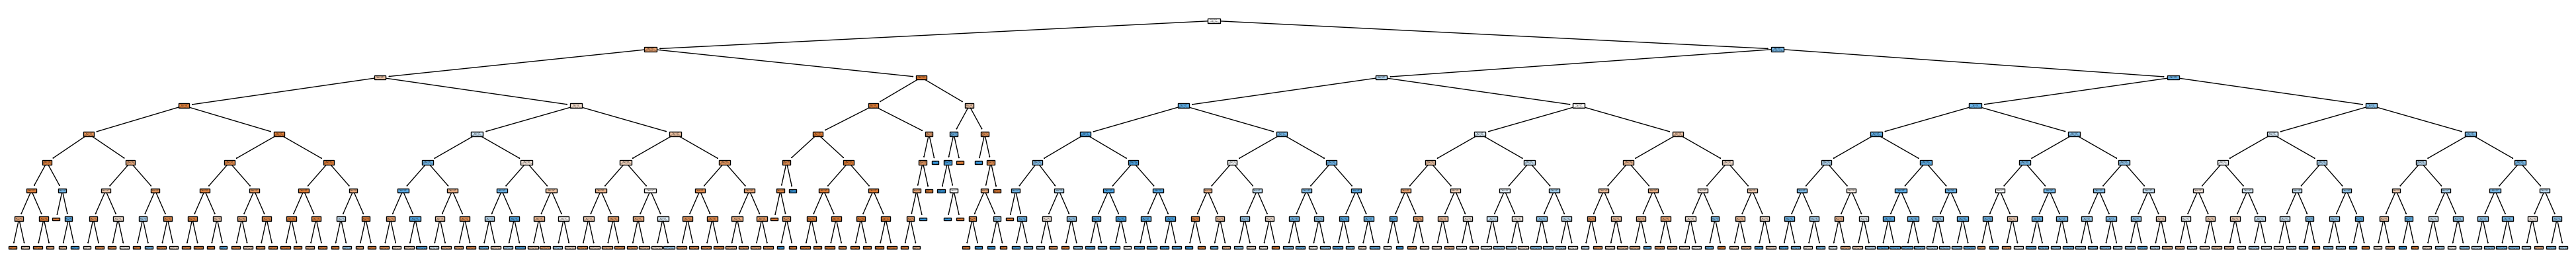

In [23]:
from sklearn import tree
plt.figure(figsize=(50,5))
tree.plot_tree(treemodel1, filled=True)
#the gini_index values are decreasing but none areleaf nodes which indicates no overfitting

[Text(0.4816854508196721, 0.9375, 'X[2] <= -0.83\ngini = 0.222\nsamples = 1606686\nvalue = [204335, 1402351]'),
 Text(0.22566598360655737, 0.8125, 'X[1] <= -1.398\ngini = 0.314\nsamples = 24011\nvalue = [19323, 4688]'),
 Text(0.10348360655737705, 0.6875, 'X[1] <= -2.407\ngini = 0.464\nsamples = 2671\nvalue = [976, 1695]'),
 Text(0.0430327868852459, 0.5625, 'X[2] <= -4.684\ngini = 0.322\nsamples = 1055\nvalue = [213, 842]'),
 Text(0.020491803278688523, 0.4375, 'X[0] <= -10.941\ngini = 0.047\nsamples = 206\nvalue = [5, 201]'),
 Text(0.012295081967213115, 0.3125, 'X[0] <= -10.969\ngini = 0.245\nsamples = 28\nvalue = [4, 24]'),
 Text(0.00819672131147541, 0.1875, 'X[2] <= -8.512\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.004098360655737705, 0.0625, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.012295081967213115, 0.0625, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.01639344262295082, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02868852459016393

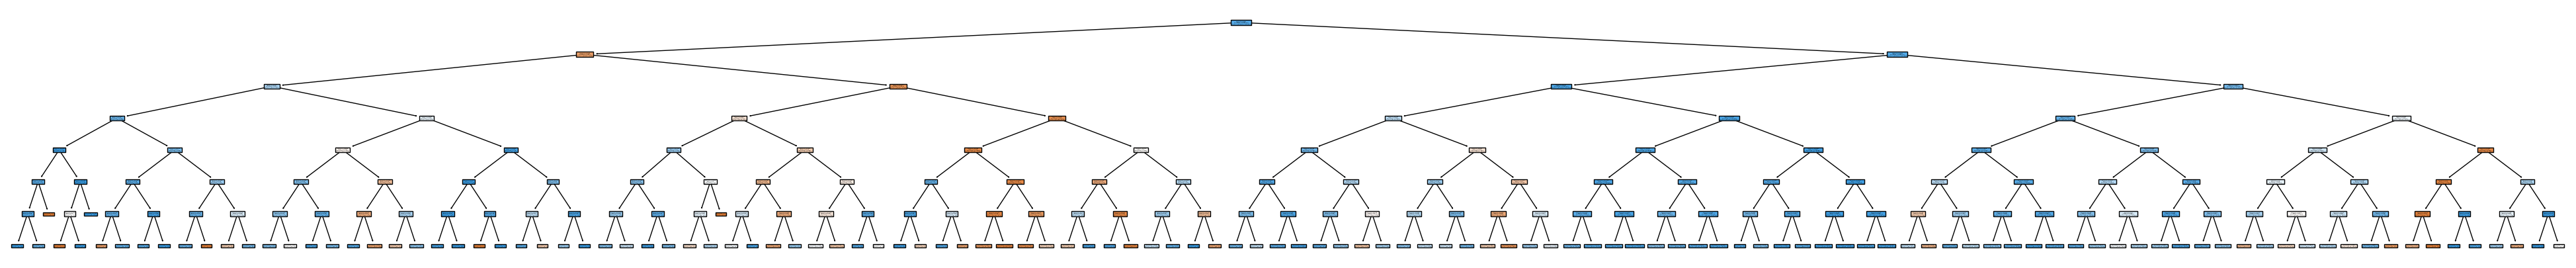

In [24]:
plt.figure(figsize=(50,5))
tree.plot_tree(treemodel2, filled=True)

[Text(0.48639516590389015, 0.95, 'X[2] <= 2.702\ngini = 0.499\nsamples = 390768\nvalue = [204458, 186310]'),
 Text(0.22910111556064072, 0.85, 'X[2] <= -0.42\ngini = 0.453\nsamples = 241220\nvalue = [157593, 83627]'),
 Text(0.10372568649885583, 0.75, 'X[2] <= -0.484\ngini = 0.155\nsamples = 35189\nvalue = [32200, 2989]'),
 Text(0.046767734553775746, 0.65, 'X[1] <= -1.625\ngini = 0.104\nsamples = 28806\nvalue = [27215, 1591]'),
 Text(0.02288329519450801, 0.55, 'X[0] <= -7.293\ngini = 0.481\nsamples = 1302\nvalue = [779, 523]'),
 Text(0.012013729977116704, 0.45, 'X[1] <= -3.747\ngini = 0.452\nsamples = 1178\nvalue = [771, 407]'),
 Text(0.005720823798627002, 0.35, 'X[1] <= -4.309\ngini = 0.349\nsamples = 120\nvalue = [27, 93]'),
 Text(0.003432494279176201, 0.25, 'X[0] <= -7.92\ngini = 0.247\nsamples = 83\nvalue = [12, 71]'),
 Text(0.002288329519450801, 0.15, 'X[0] <= -22.938\ngini = 0.2\nsamples = 80\nvalue = [9, 71]'),
 Text(0.0011441647597254005, 0.05, 'gini = 0.444\nsamples = 3\nvalue =

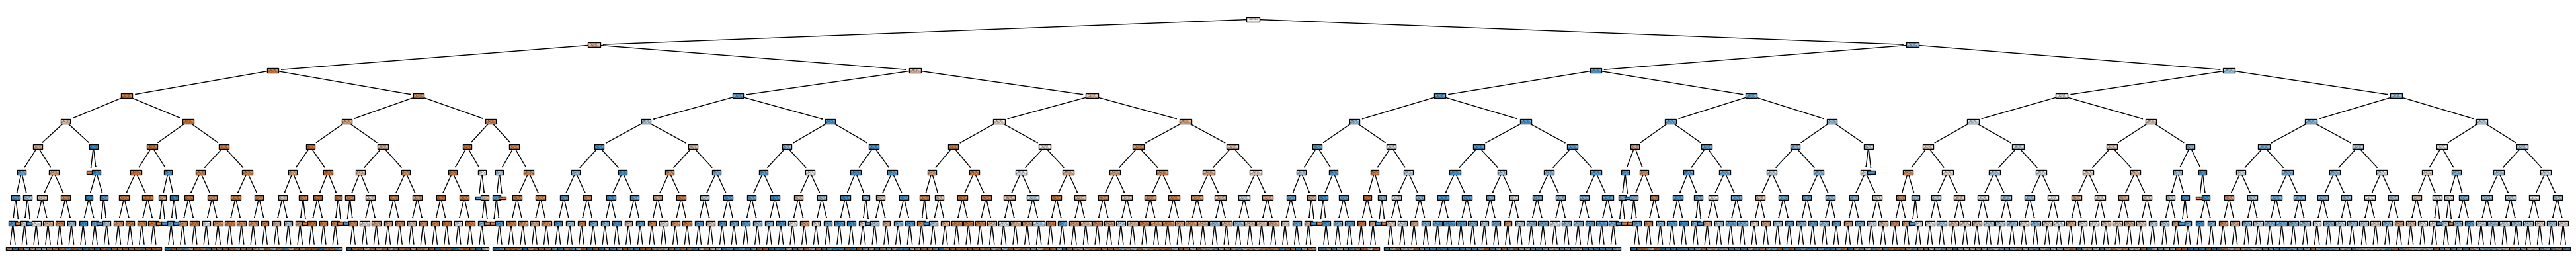

In [25]:
plt.figure(figsize=(50,5))
tree.plot_tree(treemodel3, filled=True)

<br>
<h1 style = "font-size:50px; font-family:Garamond ; font-weight : bold; background-color: #f1f5f8 ; color : #ffa500; text-align: center; border-radius: 120px 120px;">Calculating Results and Report</h1>
<br>

In [26]:
y1_pred=treemodel1.predict(X1_test)
y2_pred=treemodel2.predict(X2_test)
y3_pred=treemodel3.predict(X3_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y1_pred, y1_test)
score

0.8056455620713647

In [28]:
score = accuracy_score(y2_pred, y2_test)
score

0.8888866423876041

In [29]:
score = accuracy_score(y3_pred, y3_test)
score

0.7156217364874343

In [30]:
print(classification_report(y2_pred, y2_test))

              precision    recall  f1-score   support

           0       0.18      0.78      0.29     22891
           1       0.99      0.89      0.94    768463

    accuracy                           0.89    791354
   macro avg       0.58      0.83      0.61    791354
weighted avg       0.97      0.89      0.92    791354



In [31]:
tdcs_list = []
for name in os.listdir(test_tdcsfog):
    if name.endswith('.csv'):
        path = os.path.join(test_tdcsfog, name)
        file = pd.read_csv(path)
        file['Id'] = name[:-4] + '_' + file['Time'].apply(str)
        tdcs_list.append(file)
tdcsfog2 = pd.concat(tdcs_list, axis = 0)
tdcsfog2

,Time,AccV,AccML,AccAP,Id
0,0,-9.533939,0.566322,-1.413525,003f117e14_0
1,1,-9.536140,0.564137,-1.440621,003f117e14_1
2,2,-9.529345,0.561765,-1.429332,003f117e14_2
3,3,-9.531239,0.564227,-1.415490,003f117e14_3
4,4,-9.540825,0.561854,-1.429471,003f117e14_4
...,...,...,...,...,...
4677,4677,-9.351431,0.370047,-2.286318,003f117e14_4677
4678,4678,-9.341410,0.347721,-2.321991,003f117e14_4678
4679,4679,-9.350667,0.361341,-2.297158,003f117e14_4679
4680,4680,-9.343977,0.365726,-2.292650,003f117e14_4680


In [32]:
tdcsfog2 = reduce_memory_usage(tdcsfog2)

Memory usage of dataframe is 0.18 MB
Memory usage became:  0.20650863647460938  MB


In [33]:
defoglist = []
for name in os.listdir(test_defog):
    if name.endswith('.csv'):
        path = os.path.join(test_defog, name)
        file = pd.read_csv(path)
        file['Id'] = name[:-4] + '_' + file['Time'].apply(str)
        defoglist.append(file)
defog2 = pd.concat(defoglist, axis = 0)
defog2

,Time,AccV,AccML,AccAP,Id
0,0,-0.914652,-0.300851,0.298156,02ab235146_0
1,1,-0.914367,-0.301572,0.298325,02ab235146_1
2,2,-0.779540,-0.343197,0.275690,02ab235146_2
3,3,-0.993162,-0.270281,0.315775,02ab235146_3
4,4,-0.948767,-0.307849,0.297191,02ab235146_4
...,...,...,...,...,...
281683,281683,-0.899299,-0.232668,0.389147,02ab235146_281683
281684,281684,-0.901973,-0.233051,0.390114,02ab235146_281684
281685,281685,-0.901690,-0.231888,0.391896,02ab235146_281685
281686,281686,-0.899576,-0.232429,0.391106,02ab235146_281686


In [34]:
defog2 = reduce_memory_usage(defog2)

Memory usage of dataframe is 10.75 MB
Memory usage became:  13.972709655761719  MB


In [35]:
new_df = pd.concat([tdcsfog2, defog2], axis = 0).reset_index(drop = True)
new_df

,Time,AccV,AccML,AccAP,Id
0,0,-9.531250,0.566406,-1.413086,003f117e14_0
1,1,-9.539062,0.563965,-1.440430,003f117e14_1
2,2,-9.531250,0.561523,-1.429688,003f117e14_2
3,3,-9.531250,0.564453,-1.415039,003f117e14_3
4,4,-9.539062,0.562012,-1.429688,003f117e14_4
...,...,...,...,...,...
286365,281683,-0.899414,-0.232666,0.389160,02ab235146_281683
286366,281684,-0.901855,-0.233032,0.390137,02ab235146_281684
286367,281685,-0.901855,-0.231934,0.391846,02ab235146_281685
286368,281686,-0.899414,-0.232422,0.391113,02ab235146_281686


In [36]:
new_test = new_df.iloc[:, 1:4]

In [37]:
y1_p = treemodel1.predict(new_test)
y2_p = treemodel2.predict(new_test)
y3_p = treemodel3.predict(new_test)

In [38]:
new_df['StartHesitation'] = y1_p
new_df['Turn'] = y2_p 
new_df['Walking'] = y3_p

In [39]:
new_df

,Time,AccV,AccML,AccAP,Id,StartHesitation,Turn,Walking
0,0,-9.531250,0.566406,-1.413086,003f117e14_0,0,0,0
1,1,-9.539062,0.563965,-1.440430,003f117e14_1,0,0,0
2,2,-9.531250,0.561523,-1.429688,003f117e14_2,0,0,0
3,3,-9.531250,0.564453,-1.415039,003f117e14_3,0,0,0
4,4,-9.539062,0.562012,-1.429688,003f117e14_4,0,0,0
...,...,...,...,...,...,...,...,...
286365,281683,-0.899414,-0.232666,0.389160,02ab235146_281683,0,0,0
286366,281684,-0.901855,-0.233032,0.390137,02ab235146_281684,0,0,0
286367,281685,-0.901855,-0.231934,0.391846,02ab235146_281685,0,0,0
286368,281686,-0.899414,-0.232422,0.391113,02ab235146_281686,0,0,0


In [40]:
submission=new_df.iloc[:, 4:].fillna(0.0)

In [41]:
submission.to_csv("submission.csv", index=False)

In [42]:
submission

,Id,StartHesitation,Turn,Walking
0,003f117e14_0,0,0,0
1,003f117e14_1,0,0,0
2,003f117e14_2,0,0,0
3,003f117e14_3,0,0,0
4,003f117e14_4,0,0,0
...,...,...,...,...
286365,02ab235146_281683,0,0,0
286366,02ab235146_281684,0,0,0
286367,02ab235146_281685,0,0,0
286368,02ab235146_281686,0,0,0
